In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report , accuracy_score
from xgboost import XGBClassifier

In [146]:
df=pd.read_csv('Train_Data (1).csv')
df2=pd.read_csv('Test_Data (1).csv')
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [147]:
df2.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [148]:
data=pd.DataFrame(df)

In [149]:
null_counts=data.isnull().sum()
null_counts

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [150]:
data.shape

(1966, 9)

In [151]:
df2.shape

(312, 8)

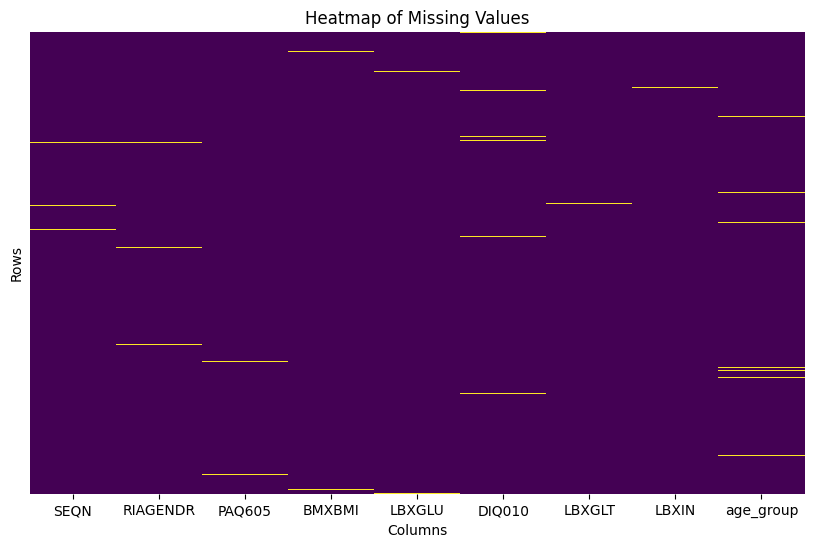

In [152]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [153]:
# Create a copy
dfi = data.copy()

# Drop rows with missing 'SEQN' (critical ID column)
dfi.drop(columns=['SEQN'], inplace=True)



# Handle categorical columns separately
categorical_cols = ['RIAGENDR', 'DIQ010', 'age_group', 'PAQ605']
for col in categorical_cols:
    mode_val = dfi[col].mode()[0] 
    dfi[col].fillna(mode_val, inplace=True)
    

# Select numeric columns for Iterative Imputation
numeric_cols = dfi.select_dtypes(include=['float64', 'int64']).columns


# Apply Iterative Imputer
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0
)

# Fit and transform
dfi[numeric_cols] = imputer.fit_transform(dfi[numeric_cols])


# Check for remaining missing values
print(dfi.isnull().sum().sort_values(ascending=False).head(10))



C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_19840\1348119460.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfi[col].fillna(mode_val, inplace=True)


RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64


C:\Users\Mahi Garg\AppData\Roaming\Python\Python313\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [154]:
dfi.shape


(1966, 8)

In [155]:
# dfi2 = data2.copy()
dfi2 = df2.copy()
dfi2.drop(columns=['SEQN'], inplace=True)

cat_cols = ['RIAGENDR', 'DIQ010', 'PAQ605']
for col in cat_cols:
    modev = dfi2[col].mode()[0] 
    dfi2[col].fillna(modev, inplace=True)

num_cols = dfi2.select_dtypes(include=['float64', 'int64']).columns

# Apply Iterative Imputer
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

dfi2[num_cols] = imputer.fit_transform(dfi2[num_cols])
print(dfi2.isnull().sum().sort_values(ascending=False).head(10))



C:\Users\Mahi Garg\AppData\Local\Temp\ipykernel_19840\3511440803.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfi2[col].fillna(modev, inplace=True)


RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64


In [156]:
dfi2.shape

(312, 7)

In [157]:
dfi.head()


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [158]:
dfi2.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [159]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RIAGENDR   1966 non-null   float64
 1   PAQ605     1966 non-null   float64
 2   BMXBMI     1966 non-null   float64
 3   LBXGLU     1966 non-null   float64
 4   DIQ010     1966 non-null   float64
 5   LBXGLT     1966 non-null   float64
 6   LBXIN      1966 non-null   float64
 7   age_group  1966 non-null   object 
dtypes: float64(7), object(1)
memory usage: 123.0+ KB


In [160]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfi['age_group_encoded'] = le.fit_transform(dfi['age_group'])

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfi[['BMXBMI', 'LBXGLU', 'age_group_encoded']])
scaled_data2 = scaler.fit_transform(dfi2[['BMXBMI', 'LBXGLU']])

In [162]:
dfi['glucose_insulin_ratio'] = dfi['LBXGLU'] / (dfi['LBXIN'] + 1e-5)
dfi['is_obese'] = (dfi['BMXBMI'] >= 30).astype(int)
dfi['high_glucose_flag'] = (dfi['LBXGLU'] >= 126).astype(int)
dfi['bmi_glucose_product']=dfi['BMXBMI']*dfi['LBXGLU']
dfi['insulin_glucose_diff']=dfi['LBXIN']-dfi['LBXGLU']
dfi['bmi_squared'] = dfi['BMXBMI'] ** 2

In [163]:
dfi2['glucose_insulin_ratio'] = dfi2['LBXGLU'] / (dfi2['LBXIN'] + 1e-5)
dfi2['is_obese'] = (dfi2['BMXBMI'] >= 30).astype(int)
dfi2['high_glucose_flag'] = (dfi2['LBXGLU'] >= 126).astype(int)
dfi2['bmi_glucose_product']=dfi2['BMXBMI']*dfi2['LBXGLU']
dfi2['insulin_glucose_diff']=dfi2['LBXIN']-dfi2['LBXGLU']
dfi2['bmi_squared'] = dfi2['BMXBMI'] ** 2

In [164]:
dfi.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,age_group_encoded,glucose_insulin_ratio,is_obese,high_glucose_flag,bmi_glucose_product,insulin_glucose_diff,bmi_squared
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,0,7.377594,1,0,3927.0,-95.09,1274.49
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,0,23.116823,0,0,1806.7,-85.15,412.09
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,0,14.495090,0,0,2064.8,-82.86,538.24
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult,0,6.439624,0,0,3005.6,-87.85,835.21
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,0,9.432226,1,0,3697.7,-92.08,1288.81


In [165]:
X = dfi.select_dtypes(include=[np.number]).drop(columns=['age_group_encoded'])
y = dfi['age_group_encoded']
x_test=dfi2.select_dtypes(include=[np.number])

In [166]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       338
           1       0.40      0.18      0.25        56

    accuracy                           0.85       394
   macro avg       0.64      0.57      0.58       394
weighted avg       0.81      0.85      0.82       394

Accuracy: 0.8451776649746193


In [168]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
# rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [169]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8553299492385786
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       338
           1       0.47      0.12      0.20        56

    accuracy                           0.86       394
   macro avg       0.67      0.55      0.56       394
weighted avg       0.81      0.86      0.82       394



In [170]:
model2 =XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model2.fit(X_train, y_train)
# Predict and evaluate
y_pred = model2.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


C:\Users\Mahi Garg\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:46:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8324873096446701
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       338
           1       0.29      0.12      0.17        56

    accuracy                           0.83       394
   macro avg       0.58      0.54      0.54       394
weighted avg       0.79      0.83      0.80       394



In [171]:

feature_scores = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_scores.sort_values(ascending=False).head(10).index

X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8451776649746193
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       338
           1       0.40      0.18      0.25        56

    accuracy                           0.85       394
   macro avg       0.64      0.57      0.58       394
weighted avg       0.81      0.85      0.82       394



In [172]:
print('Best model is RandomForestClassifier with accuracy 0.859 ')

test_preds_encoded = best_model.predict(x_test)


# 📄 Create submission DataFrame
submissionss = pd.DataFrame({
    'age_group': test_preds_encoded
})

submissionss.to_csv('submissionss1.csv',index=False)


Best model is RandomForestClassifier with accuracy 0.859 
